<a href="https://colab.research.google.com/github/taufiksatrian/freeCodeCamp-Machine-Learning-with-Python/blob/main/Convolutional-Neural-Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Convolutional Neural Network**

### **Convolutional Neural Network**

**Deep Computer Vision**
- Image Data
- Convolutional Layer
- Pooling Layer
- CNN Architectures

**Image Data**

These 3 dimensions are as follows:
- Image Height
- Image Width
- Color Channels

**Convoltional Neural Network**


### **The Convolutional Layer**

### **Creating a Convolutional Neural Network**

**Dataset**

*CIFAR Image Dataset* it contions 60.000 32x32 color images with 6000 images of each class
- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

In [7]:
# Import 
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [8]:
# Load and Split Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['ariplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'ship', 'truck']

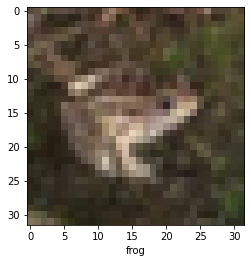

In [31]:
# Look at one Image
IMG_INDEX = 22

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

**CNN Architecture**

Convolutional Base

In [32]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

**Layer 1**

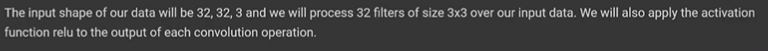

**Layer 2**

image.png

**Other Layers**

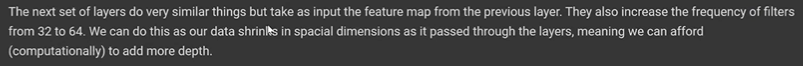

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-traina

**Adding Dense Layers**

In [35]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

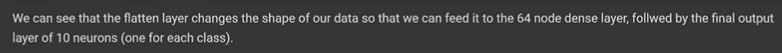

**Training**

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 81s 51ms/step - loss: 1.5034 - accuracy: 0.4492 - val_loss: 1.2530 - val_accuracy: 0.5550
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1415 - accuracy: 0.5971 - val_loss: 1.0576 - val_accuracy: 0.6316
Epoch 3/10
1563/1563 [==============================] - 88s 56ms/step - loss: 0.9977 - accuracy: 0.6489 - val_loss: 0.9959 - val_accuracy: 0.6511
Epoch 4/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.8963 - accuracy: 0.6857 - val_loss: 0.9383 - val_accuracy: 0.6775
Epoch 5/10
1563/1563 [==============================] - 85s 55ms/step - loss: 0.8293 - accuracy: 0.7093 - val_loss: 0.8742 - val_accuracy: 0.6996
Epoch 6/10
1563/1563 [==============================] - 102s 65ms/step - loss: 0.7738 - accuracy: 0.7274 - val_loss: 0.8895 - val_accuracy: 0.6894
Epoch 7/10
1563/1563 [==============================] - 105s 67ms/step - loss: 0.7227 - accuracy: 0.7468 - val_loss: 0.8467

### **Evaluating the Model**

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.9200 - accuracy: 0.6969 - 3s/epoch - 11ms/step
0.6969000101089478


**Working with Small Datasets**

*Data Augmentation*

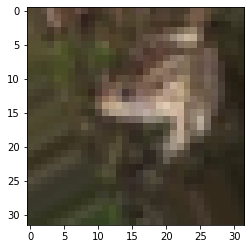

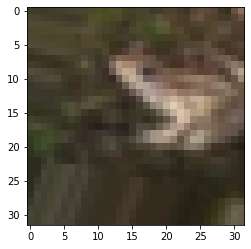

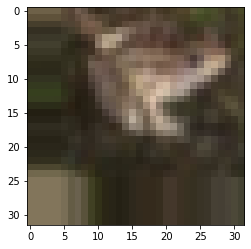

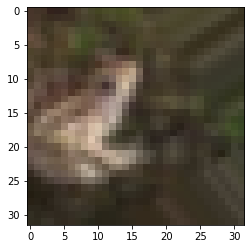

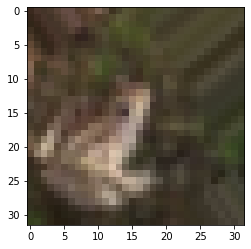

In [48]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import keras.utils as image # Stackoverflow

# Create a data generator object that transforms images
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

# Pick an images to transform
test_img = train_images[22]
img = image.img_to_array(test_img) # COnvert image to numpy array 
img = img.reshape((1,) + img.shape) # Reshape image

i = 0
for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i > 4:
    break

plt.show()

*Pretrained Models*

*Fine Tuning*

**Using a Pretrained Model**

### **Full Code**